# Final Project  
-Derek Allmon 
-Yousuf Kanan

## Description 
---
 Our team has been approached by the client to aid them with helping to find what factors may be contributing to diabetes patients being readmitted within 30 days of being discharged from a hospital. We will use machine learning to help identify key predictors and find correlations that can help healthcare providers give better treatment to their patients and help to improve patient outcomes. 



# Frame the Problem and Look at the Big Picture 

---
#### 1. Define the objective in business terms.
    Our objective is to predict what patients would be more likley to have a readmission into the hospital within 30 days of treatment. 

#### 2. How will your solution be used?
    Our solution will be used to help find what comminalites patients may have that make them more suceptible to being readmitted to the hospital. This will help to give more preventable care to patients and will reduce the cost for healthcare facilites and improve the health of patients. 

#### 3. What are the current solutions/workarounds (if any)?
    Our team was not provided with any current solutions to the issue. We can assume that each medical facility has certain protocols on how to best prevent patient re-admission.

#### 4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
    This problem should be framed as a supervised offline learning problem. This problem could be an online problem to track changes over time as more information is gain but we do not currently have access to this data. 

#### 5. How should performance be measured?
    We will be measuring performance with F1 score. We will be using this scoring metric because we do not know what factors are important in if a patient will be readmitted. It is possible that a common factor may require extra medical care and this can be detrimental to the patient if they are caught as a false positive as it may waste hospital resources and the patient will have to pay for unnecessary treatment. If a patient is a false negative and they do not receive aid that would prevent a readmission then there is a risk of future injury for the patient. We want to balance out both risks so F1 score seems appropriate. If the client had a particular outcome that they would find more favorable then we would be able to adjust our scoring metric. 

#### 6. What would be the minimum performance needed to reach the business objective?
    As we do not know how the hospitals are currently predicting the outcomes of patients we will say that a score above 0.65 would be considered a minimum score for our objective. 

#### 7. What are comparable problems? Can you reuse experience or tools?
    We can use previous experience from other classification problems we have worked on. 
    
#### 8. Is human expertise available?
    We currently do not have any human expertise avialable 

#### 9. How would you solve the problem manually?
    To solve the problem manually our team would use data to see which patients are re-admitted and see what obvious commonallites could be found from said data

#### 10. List the assumptions you (or others) have made so far.
    - The data is accurate and up to data 
    - The data is labeled correctly 
    

# Get the Data
---
#### 1. List the data you need and how much you need.
    We will need patient data including age, race, sex, and any medical data that is available without exposing any sensitive information 

#### 2. Find and document where you can get that data.

 We acquired the data through [UC Irving Machine Learning Repository](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)

#### 3. Get access authorizations.
    N/A 

#### 4. Create a workspace (with enough storage space).
    N/A

#### 5. Get the data.
    https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008
 
#### 6. Convert the data to a format you can easily manipulate (without changing the data itself).
- N/A
#### 7. Ensure sensitive information is deleted or protected (e.g. anonymized)
    The data is anonymized to not include any patient 

#### 8. Check the size and type of data (time series, sample, geographical, etc.).
    The data is sample data and has 50 features. 

#### 9. Sample a test set, put it aside, and never look at it (no data snooping!).
    Done!

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler
from pandas.tseries.offsets import MonthEnd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report , confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from joblib import parallel_backend


import pickle



In [2]:
# load the data
df = pd.read_csv('diabetic_data.csv')

# seperate the test and training set 
X = df.drop('readmitted', axis=1)
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






# Data Exploration 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

Based on the graphs above , it seems that the when looking at lab proceeders, there is a concentration of patinets returning to the hospital within 30 days. This is a good indicator that the # of lab proceeders could be a good feature to use in our model.



In [4]:
df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

| Name                     | Type                   | Noise                        | Usefullnes      |
| ------------------------ | ---------------------- | ---------------------------- | --------------- |
| encounter_id             | Int                    |                              | possibly useful |
| patient_nbr              | Int                    |                              | not             |
| race                     | String                 | 2% of data is marked as '?'  | yes             |
| gender                   | String                 |                              | yes             |
| age                      | object (age range)     |                              | yes             |
| weight                   | object (weight range)  | 97% of data is marked as '?' | yes             |
| admission_type_id        | Int                    |                              | possibly useful |
| discharge_disposition_id | Int                    |                              | possibly useful |
| admission_source_id      | int                    |                              | possibly useful |
| time_in_hospital         | int                    |                              | yes             |
| payer_code               | String                 |                              | possibly useful |
| medical_specialty        | String                 |                              | possibly useful |
| num_lab_procedures       | int                    |                              | yes             |
| num_procedures           | int                    |                              | yes             |
| num_medications          | int                    |                              | yes             |
| number_outpatient        | int                    |                              | yes             |
| number_emergency         | int                    |                              | yes             |
| number_inpatient         | int                    |                              | yes             |
| diag_1                   | float                  |                              | possibly useful |
| diag_2                   | float                  |                              | possibly useful |
| diag_3                   | float                  |                              | possibly useful |
| number_diagnoses         | int                    |                              | yes             |
| max_glu_serum            | String                 | is missing 95% of the data   |                 |
| A1Cresult                | String                 | is missing 83%               | possibly useful |
| metformin                | String                 |                              | possibly useful |
| repaglinide              | String                 |                              | possibly useful |
| nateglinide              | String                 |                              | possibly useful |
| chlorpropamide           | String                 |                              | possibly useful |
| glimepiride              | String                 |                              | possibly useful |
| acetohexamide            | String                 |                              | possibly useful |
| glipizide                | String                 |                              | possibly useful |
| glyburide                | String                 |                              | possibly useful |
| tolbutamide              | String                 |                              | possibly useful |
| pioglitazone             | String                 |                              | possibly useful |
| rosiglitazone            | String                 |                              | possibly useful |
| acarbose                 | String                 |                              | possibly useful |
| miglitol                 | String                 |                              | possibly useful |
| troglitazone             | String                 |                              | possibly useful |
| tolazamide               | String                 |                              | possibly useful |
| examide                  | String                 |                              | possibly useful |
| citoglipton              | String                 |                              | possibly useful |
| insulin                  | String                 |                              | possibly useful |
| glyburide-metformin      | String                 |                              | possibly useful |
| glipizide-metformin      | String                 |                              | possibly useful |
| glimepiride-pioglitazone | String                 |                              | possibly useful |
| metformin-rosiglitazone  | String                 |                              | possibly useful |
| metformin-pioglitazone   | String                 |                              | possibly useful |
| change                   | String                 |                              | possibly useful |
| diabetesMed              | string (binary yes/no) |                              | possibly useful |
| readmitted               | string                 |                              | yes (target)    |

The dataset has 50 features and a large selection of features are medication. it is possible there may be a higher correlation with medication use and hospital readmittance.

In [37]:
# List of medication columns
medication_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
    'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'insulin'
]

# Calculate value counts for each medication
medication_value_counts = {col: df[col].value_counts() for col in medication_cols}

# Display the results
for med, counts in medication_value_counts.items():
    print(f"Value counts for {med}:\n{counts}\n")


Value counts for metformin:
metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

Value counts for repaglinide:
repaglinide
No        100227
Steady      1384
Up           110
Down          45
Name: count, dtype: int64

Value counts for nateglinide:
nateglinide
No        101063
Steady       668
Up            24
Down          11
Name: count, dtype: int64

Value counts for chlorpropamide:
chlorpropamide
No        101680
Steady        79
Up             6
Down           1
Name: count, dtype: int64

Value counts for glimepiride:
glimepiride
No        96575
Steady     4670
Up          327
Down        194
Name: count, dtype: int64

Value counts for glipizide:
glipizide
No        89080
Steady    11356
Up          770
Down        560
Name: count, dtype: int64

Value counts for glyburide:
glyburide
No        91116
Steady     9274
Up          812
Down        564
Name: count, dtype: int64

Value counts for pioglitazone:
pioglitazone
No        94438
Ste

From the counts of the mediation it appears that insulin is the most commonly used and will have the most use in our problem.The medication is not being measured numerically so we will not have exact numbers on its impact.

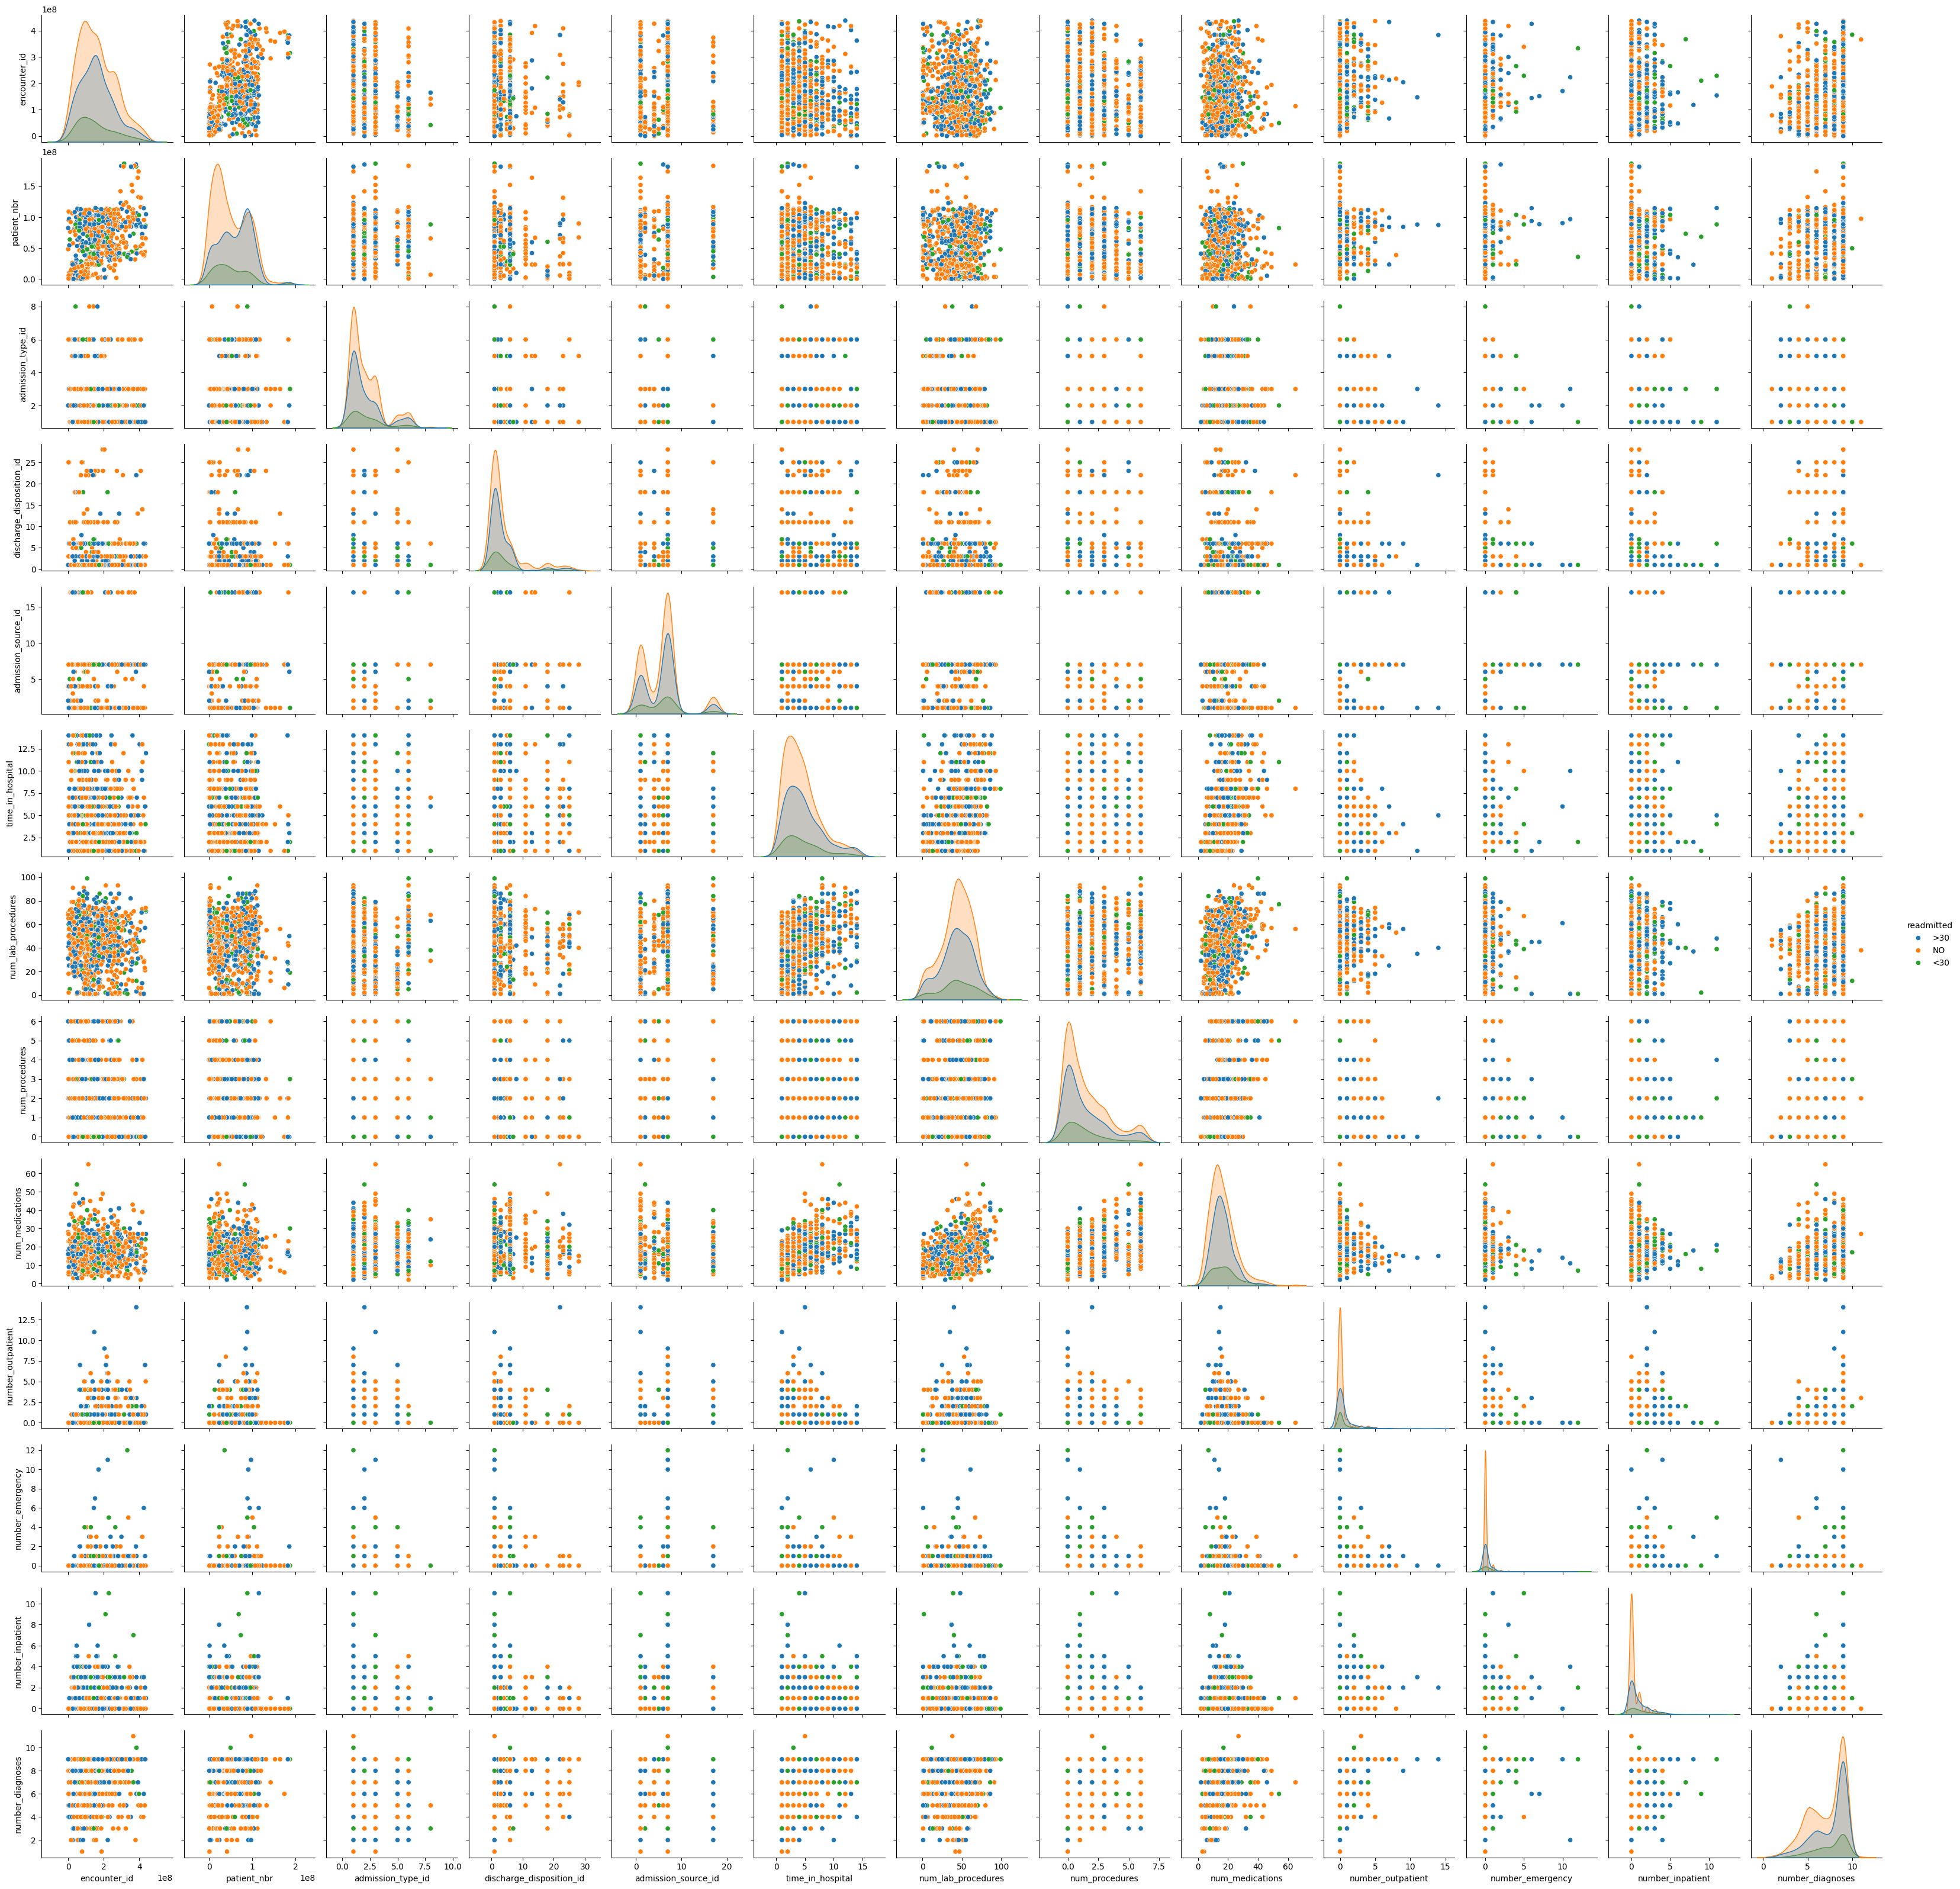

In [5]:
sns.pairplot(df.sample(1000), hue='readmitted', diag_kind='kde')
plt.show()

In [6]:
df['weight'].value_counts()


weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

Because the weight column is missing a lot of values, we should consider dropping it from our model, also 
it seems concerning that the most common weight is 75-100 lbs, this could be a sign that the data is not accurate.

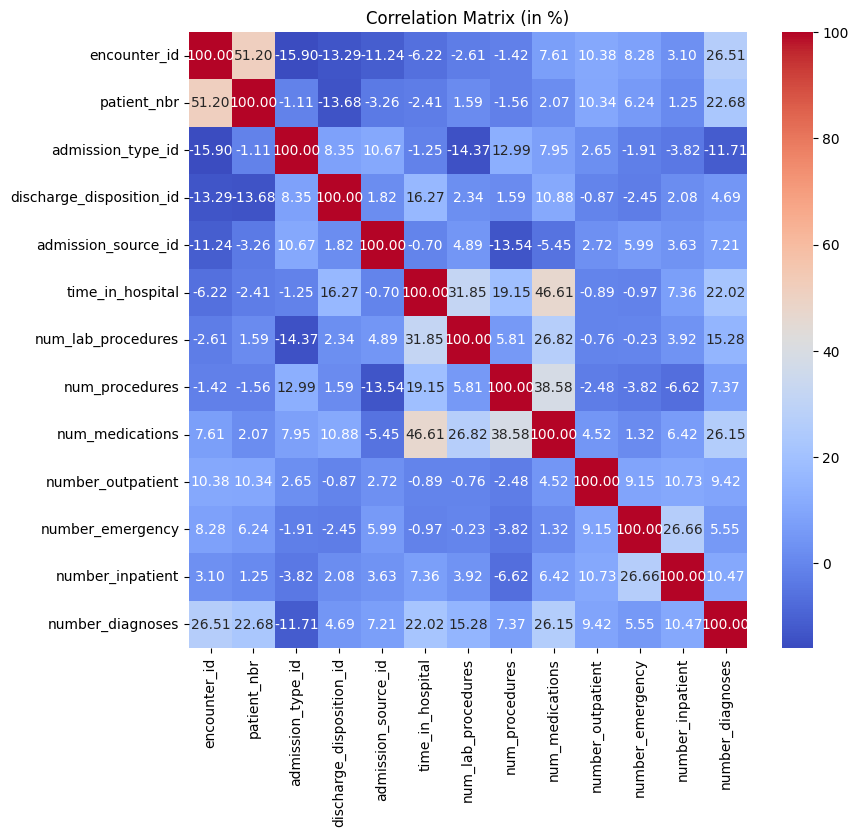

In [7]:
# Get the correlation matrix of numerical columns only
df2 = df.select_dtypes(include=[np.number])
corr = df2.corr()

# Normalize the correlation matrix to show percentages
corr_percent = corr * 100

# Plot the heatmap
plt.figure(figsize=(9, 8))  # Adjust the figure size as needed
sns.heatmap(corr_percent, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (in %)')
plt.show()


Using the correlation matrix we are able to see there is a high positive correlation with factors such as number of medications and the time in hospital along with encounter id and patient number. The same positive correlation can be seen with the time in hospital and number of procedures and lab procedures, this is to be expected as someone who is in the hospital for a longer time will be provided with more care.

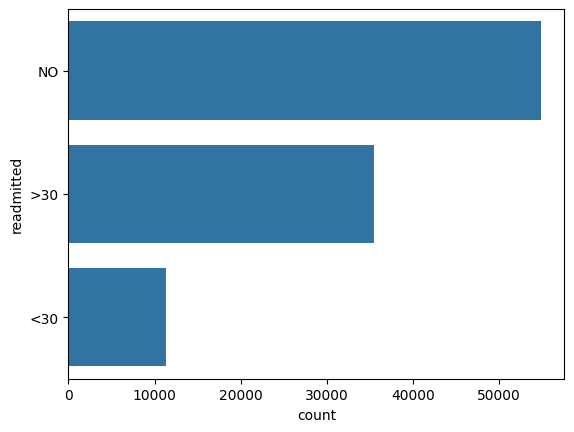

In [8]:
#look at the target variable distribution
sns.countplot(df['readmitted'])
plt.show()

Because there are 3 different classes of readmission, we will need to treat this as a multi-class classification problem. We will incorporate a scoring system for each readmission class. if the patient is readmitted within 30 days, they will be given a score of 1, if they are readmitted within >30 days, they will be given a score of 2, and if they are not readmitted, they will be given a score of 3. This will allow us to use a single model to predict the readmission class.

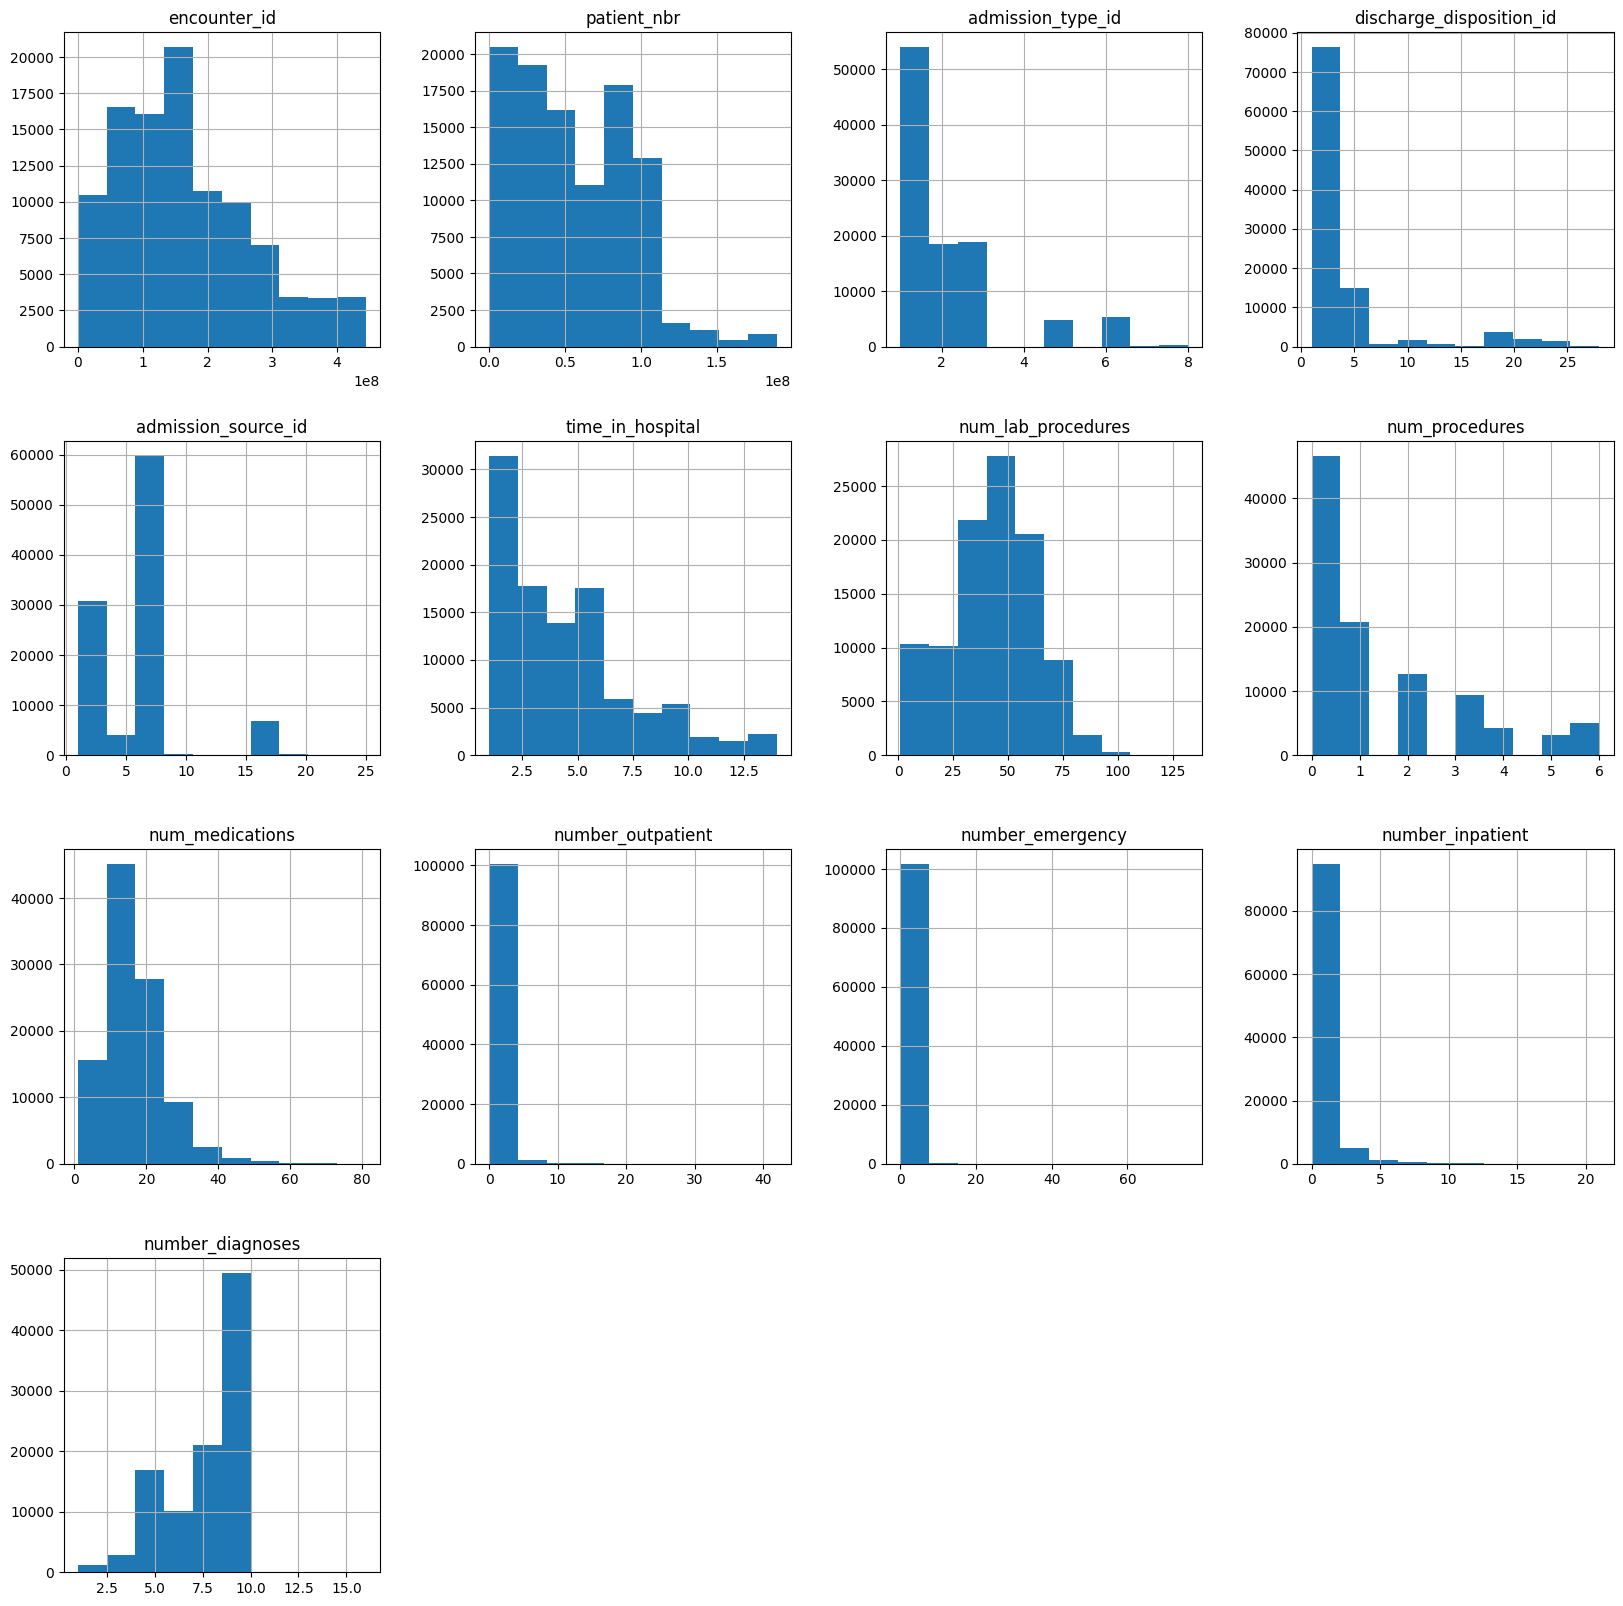

In [9]:
# look at the distribution of the numerical columns 
df2.hist(figsize=(20,20))
plt.show()


With the given data we can see that a majority of patients are admitted with the emergency classification. Most patients stay for 1-2.5 days and are discharged to home. We can use this information to inform our future data exploration. 

In [10]:
# look at information about the categorical columns
df.describe(include=['O'])

race  gender      age  weight payer_code medical_specialty  \
count      101766  101766   101766  101766     101766            101766   
unique          6       3       10      10         18                73   
top     Caucasian  Female  [70-80)       ?          ?                 ?   
freq        76099   54708    26068   98569      40256             49949   

        diag_1  diag_2  diag_3 max_glu_serum  ... citoglipton insulin  \
count   101766  101766  101766          5346  ...      101766  101766   
unique     717     749     790             3  ...           1       4   
top        428     276     250          Norm  ...          No      No   
freq      6862    6752   11555          2597  ...      101766   47383   

       glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
count               101766              101766                   101766   
unique                   4                   2                        2   
top                     No                  No                       No   
freq                101060              101753                   101765   

       metformin-rosiglitazone metformin-pioglitazone  change diabetesMed  \
count                   101766                 101766  101766      101766   
unique                       2                      2       2           2   
top                         No                     No      No         Yes   
freq                    101764                 101765   54755       78363   

       readmitted  
count      101766  
unique          3  
top            NO  
freq        54864  

[4 rows x 37 columns]

/var/folders/f8/pyz20pzd513676ck8xv53jsm0000gp/T/ipykernel_35675/2664730038.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtered['race_num'] = df_filtered['race'].replace({'Caucasian': 0, 'AfricanAmerican': 1, 'Hispanic': 2, 'Asian': 3, 'Other': 4, "?":5}).astype(int)


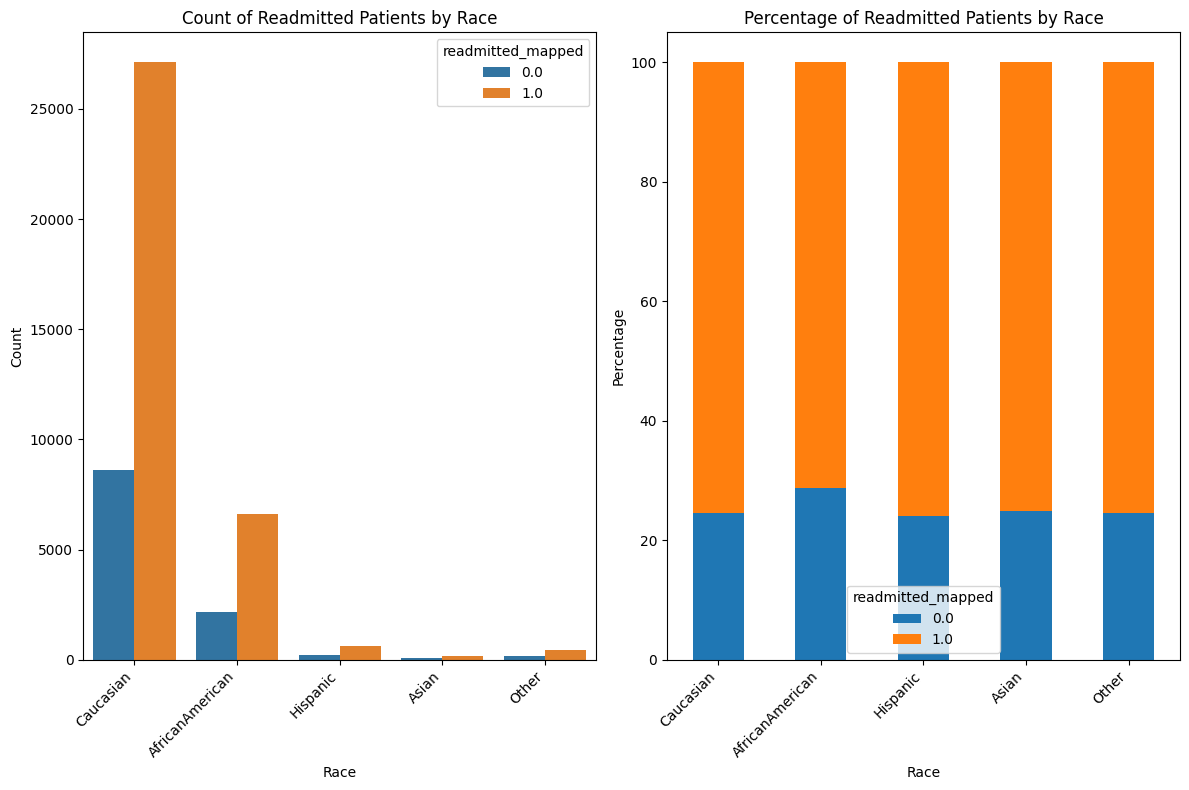

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows with '?' in the 'race' column
df_filtered = df[df['race'] != '?'].copy()  # Using .copy() to avoid setting with copy warning

# Convert 'race' to a numerical feature safely
df_filtered['race_num'] = df_filtered['race'].replace({'Caucasian': 0, 'AfricanAmerican': 1, 'Hispanic': 2, 'Asian': 3, 'Other': 4, "?":5}).astype(int)

# Convert 'readmitted' to the desired categories for legend mapping safely
readmitted_map = {'<30': 0, '>30': 1, 'No': 2}
df_filtered.loc[:, 'readmitted_mapped'] = df_filtered['readmitted'].map(readmitted_map)

# Set the figure size for both plots
plt.figure(figsize=(14, 10))

# Subplot 1: Original count plot
plt.subplot(1, 2, 1)
sns.countplot(x='race_num', hue='readmitted_mapped', data=df_filtered)
plt.xticks([0, 1, 2, 3, 4], ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other'], rotation=45, ha='right')
plt.title('Count of Readmitted Patients by Race')
plt.xlabel('Race')
plt.ylabel('Count')

# Subplot 2: Percentage stacked bar plot
plt.subplot(1, 2, 2)
# Group by 'race' and calculate the percentage of readmitted patients for each race
readmission_by_race = df_filtered.groupby('race')['readmitted_mapped'].value_counts(normalize=True).unstack(fill_value=0) * 100

# Convert the index to string for plotting
readmission_by_race.index = readmission_by_race.index.astype(str)

# Plot the data as a stacked bar plot
readmission_by_race.plot(kind='bar', stacked=True, figsize=(12, 8), ax=plt.gca())

plt.title('Percentage of Readmitted Patients by Race')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2, 3, 4], ['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other'], rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

The Probability of an African American patient being readmitted within 30 days is higher than the probability of a Caucasian patient being readmitted within 30 days. This could be a good feature to use in our model. 

It is also interesting to note that this might indicate that African American patients are not receiving the same level of care as Caucasian patients. This would have to be further investigated, a hypothesis test could be conducted to determine if this is statistically significant.

In [12]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_filtered['race'], df_filtered['readmitted_mapped'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpret the results
if p < 0.05:
    print("There is a statistically significant association between race and readmission.")
else:
    print("No statistically significant association found between race and readmission.")


Chi-Square Test Results:
Chi2 Statistic: 3.667864242664743
P-Value: 0.4528171253109812
Degrees of Freedom: 4
Expected Frequencies:
[[ 2125.87363565  6663.12636435]
 [   54.66463098   171.33536902]
 [ 8638.94672557 27077.05327443]
 [  206.564579     647.435421  ]
 [  142.95042879   448.04957121]]
No statistically significant association found between race and readmission.


The results of the chi-squared test indicate that race does have an impact on the readmission rate. Not only is 
this something that can help us in our model, but it is also something that should be investigated further by the hospital to ensure that all patients are receiving the same level of care.

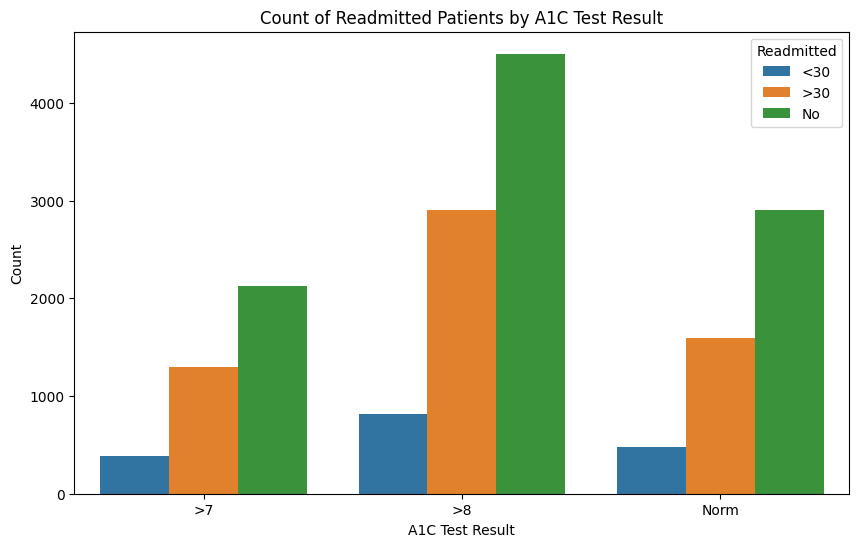

<Figure size 1200x800 with 0 Axes>

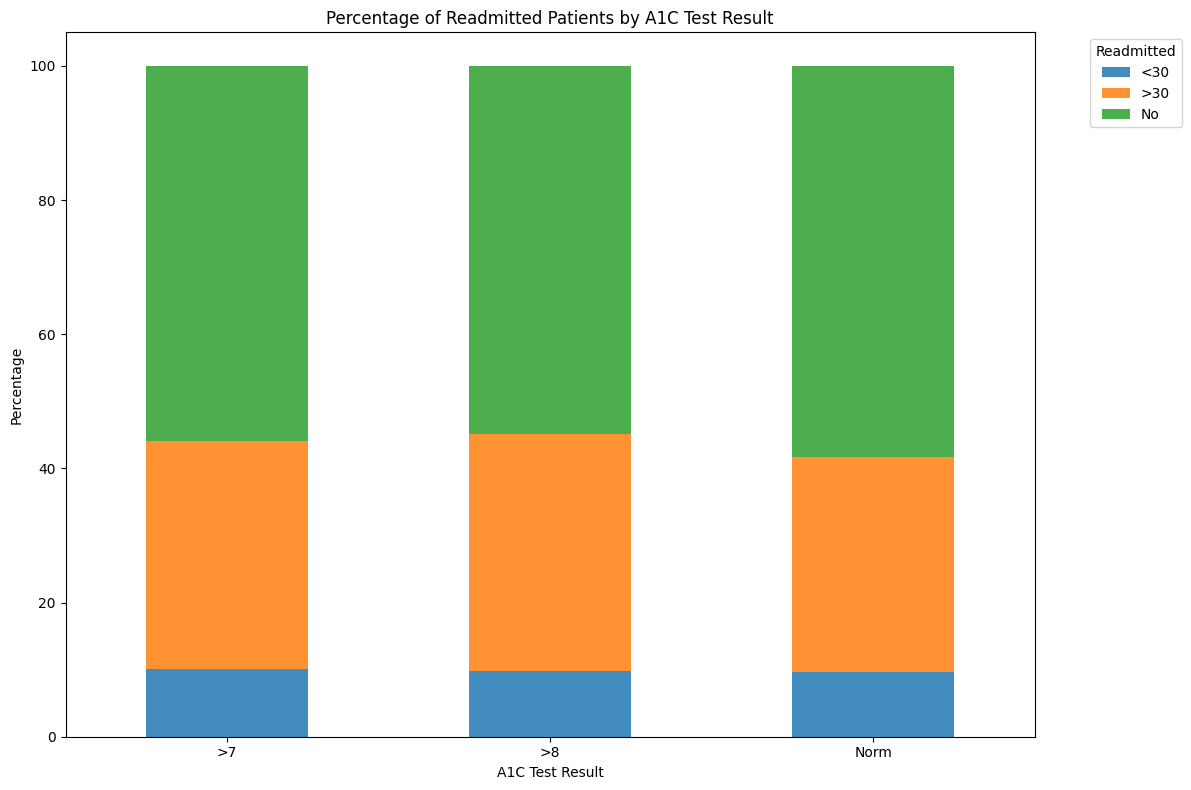

Chi-Square Test Results:
Chi2 Statistic: 16.78496097419544
P-Value: 0.0021280034928395078
The relationship between A1C Test Results and Readmission is statistically significant.


In [13]:
# Check if 'readmitted_mapped' exists in the original DataFrame
if 'readmitted_mapped' not in df.columns:
    # Assuming 'readmitted' column exists and needs to be mapped
    df['readmitted_mapped'] = df['readmitted'].map({
        '<30': '<30',
        '>30': '>30',
        'NO': 'No'
    })

# Filter out rows with '?' in the 'A1Cresult' column
df_a1c = df[df['A1Cresult'] != '?'].copy()  # Avoid setting with copy warning

# Ensure 'readmitted_mapped' is categorical for proper sorting and analysis
df_a1c['readmitted_mapped'] = pd.Categorical(
    df_a1c['readmitted_mapped'], categories=['<30', '>30', 'No'], ordered=True
)

# Countplot: Count of readmitted patients by A1C result
plt.figure(figsize=(10, 6))
sns.countplot(x='A1Cresult', hue='readmitted_mapped', data=df_a1c)
plt.title('Count of Readmitted Patients by A1C Test Result')
plt.xlabel('A1C Test Result')
plt.ylabel('Count')
plt.legend(title='Readmitted')
plt.show()

# Stacked Bar Chart: Percentage of readmitted patients by A1C result
# Normalize the value counts to calculate percentages
readmission_by_A1C = (
    df_a1c.groupby('A1Cresult')['readmitted_mapped']
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100
)

plt.figure(figsize=(12, 8))
ax = readmission_by_A1C.plot(kind='bar', stacked=True, figsize=(12, 8), alpha=0.85)
ax.set_title('Percentage of Readmitted Patients by A1C Test Result')
ax.set_xlabel('A1C Test Result')
ax.set_ylabel('Percentage')
plt.xticks(rotation=0)  # Make labels horizontal for readability
plt.legend(title='Readmitted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Additional Analysis: Chi-Square Test for Independence

# Create a contingency table
contingency_table = pd.crosstab(df_a1c['A1Cresult'], df_a1c['readmitted_mapped'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("The relationship between A1C Test Results and Readmission is statistically significant.")
else:
    print("No statistically significant relationship found between A1C Test Results and Readmission.")

on visual inspection it does not seem that a1c test results have a significant impact on readmission rates, but 
a chi-squared test determined that the realtionship between a1c test results and readmission rates is statistically significant.

Text(0, 0.5, 'Number of Diagnoses')

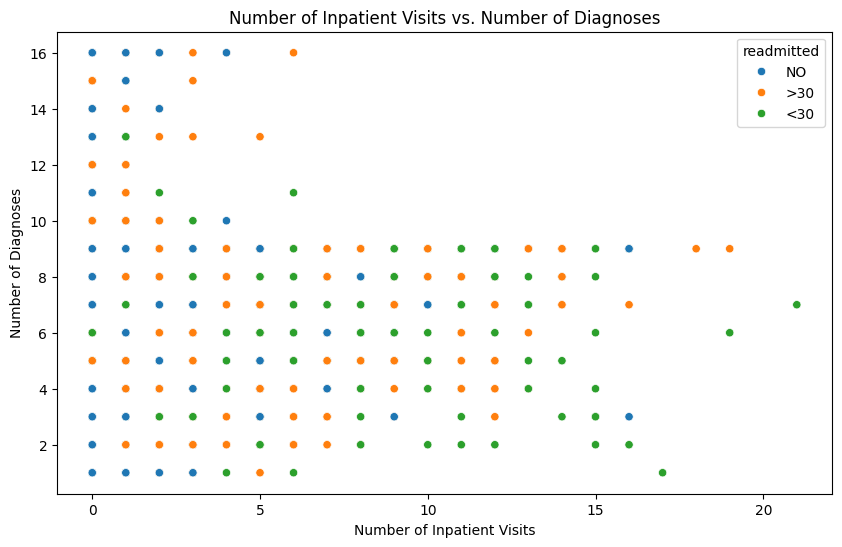

In [14]:
# plot some scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number_inpatient', y='number_diagnoses', hue='readmitted', data=df)
plt.title('Number of Inpatient Visits vs. Number of Diagnoses')
plt.xlabel('Number of Inpatient Visits')
plt.ylabel('Number of Diagnoses')



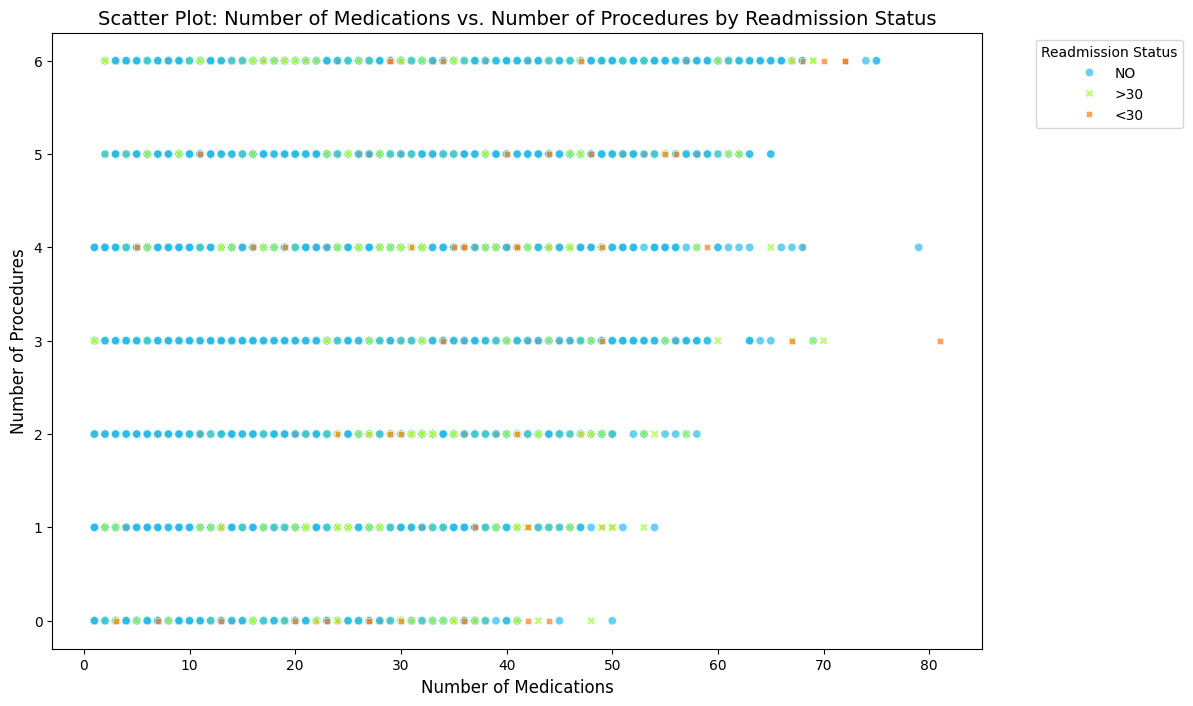

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='num_medications',
    y='num_procedures',
    hue='readmitted',  # Different colors for readmitted status
    style='readmitted',  # Different markers for readmitted status
    data=df,
    alpha=0.7,  # Transparency for overlapping points
    palette="turbo"  # Custom color palette
)

# Titles and labels
plt.title('Scatter Plot: Number of Medications vs. Number of Procedures by Readmission Status', fontsize=14)
plt.xlabel('Number of Medications', fontsize=12)
plt.ylabel('Number of Procedures', fontsize=12)
plt.legend(title='Readmission Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [29]:
#perform a chi-square test to see if there is a relationship between the number of medications and readmission
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['num_medications'], df['readmitted'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")


Chi-Square Test Results:
Chi2 Statistic: 1119.4132224407017
P-Value: 8.58737465246297e-149
Degrees of Freedom: 148


The results of the chi-squared test indicate that the number of lab procedures does have an impact on the readmission rate. This is something that can help us in our model.

In [30]:
# Let's do the pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MultiLabelBinarizer



In [18]:
df2 = df.copy()

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Custom Transformer to replace '?' with np.nan
class ReplaceQuestionMark(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.replace('?', np.nan)

# Features to drop
features_to_drop = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 
                    'medical_specialty', 'max_glu_serum', 'A1Cresult']

# Numeric, multi-label, and one-hot features (filter existing columns)
num_features = X.select_dtypes(include=[np.number]).columns
multi_label_features = [
    'metaformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 
    'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 
    'metformin-pioglitazone', 'race', 'addmission_type_id', 
    'discharge_disposition_id', 'admission_source_id'
]
one_hot_features = ['change', 'diabetesMed']

# Ensure columns exist in X
multi_label_features = [col for col in multi_label_features if col in X.columns]
one_hot_features = [col for col in one_hot_features if col in X.columns]
numeric_features = [col for col in num_features if col in X.columns]

# Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

multi_label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

one_hot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', features_to_drop),  # Directly drop columns
        ('num', numeric_transformer, numeric_features),
        ('multi_label', multi_label_transformer, multi_label_features),
        ('one_hot', one_hot_transformer, one_hot_features)
    ]
)

final_preprocessor = Pipeline(steps=[
    ('replace_question_mark', ReplaceQuestionMark()),
    ('preprocessor', preprocessor)
])

preprocessor


ColumnTransformer(transformers=[('drop_columns', 'drop',
                                 ['encounter_id', 'patient_nbr', 'weight',
                                  'payer_code', 'medical_specialty',
                                  'max_glu_serum', 'A1Cresult']),
                                ('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['encounter_id', 'patient_nbr',
                                  'admission_type_id',
                                  'discharge_disposition_id',
                                  'admission_source_id', 'time_in_hosp...
                                  'glyburide-metformin', 'glipizide-metformin',
                                  'glimepiride-pioglitazone',
                                  'metformin-rosiglitazone',
                                  'metformin-pioglitazone', 'race',
                                  'discharge_disposition_id',
                                  'admission_source_id']),
                                ('one_hot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['change', 'diabetesMed'])])

In [32]:
# test with log reg
from sklearn.linear_model import LogisticRegression

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', final_preprocessor),
                      ('classifier', LogisticRegression(max_iter=1000))])

# train the model
clf.fit(X_train, y_train)

# predict the test set
y_pred = clf.predict(X_test)

# check the accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))
#check f1 
print(classification_report(y_test, y_pred))




Accuracy: 0.5851429694408962
              precision    recall  f1-score   support

         <30       0.38      0.02      0.04      2285
         >30       0.52      0.34      0.41      7117
          NO       0.61      0.86      0.71     10952

    accuracy                           0.59     20354
   macro avg       0.50      0.41      0.39     20354
weighted avg       0.55      0.59      0.53     20354



In [21]:
# List of classifiers to compare, use the 10 most common classifiers , 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier



In [22]:
classifiers = [
    ('LogisticRegression', LogisticRegression(n_jobs=-1, random_state=42, max_iter=1000)), 
    ('LinearSVC', LinearSVC(random_state=42)),
    ('SVC-RBF', SVC(kernel='rbf', cache_size=2000, random_state=42)),
    ('KNeighbors', KNeighborsClassifier(n_jobs=-1)),  # No random_state for KNeighbors
    ('DecisionTree', DecisionTreeClassifier(min_samples_leaf=3, random_state=42)),
    ('RandomForest', RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)),
    ('ExtraTrees', ExtraTreesClassifier(max_depth=10, n_jobs=-1, random_state=42)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(n_jobs=-1, random_state=42)),
    ('GaussianNB', GaussianNB()),
    ('BernoulliNB', BernoulliNB()),
    ('SGD-log_loss', SGDClassifier(loss='log_loss', n_jobs=-1, random_state=42)), 
    ('SGD-hinge', SGDClassifier(loss='hinge', random_state=42)),
    ('Perceptron', Perceptron(random_state=42)),
    ('PassiveAggressive', PassiveAggressiveClassifier(random_state=42)),
    ('RidgeClassifier', RidgeClassifier(random_state=42)),
    ('RidgeClassifierCV', RidgeClassifierCV()),
    ('MLPClassifier', MLPClassifier(random_state=42))
]


Below is a cell that runs the model on various classifiers and prints out the accuracy of each model. The results are as follows:

- pipeline_RandomForest: 0.5853
- pipeline_ExtraTrees: 0.5447
- pipeline_DecisionTree: 0.4879
- pipeline_GaussianNB: 0.1399
- pipeline_BernoulliNB: 0.5596
- pipeline_PassiveAggressive: 0.5172
- pipeline_Perceptron: 0.4421
- pipeline_RidgeClassifier: 0.5807
- pipeline_SGD-log_loss: 0.5787
- pipeline_SGD-hinge: 0.5672
- pipeline_RidgeClassifierCV: 0.5809
- pipeline_KNeighbors: 0.5238
- pipeline_AdaBoost: 0.5915
- pipeline_LogisticRegression: 0.5848
- pipeline_LinearSVC: 0.5826
- pipeline_XGBoost: 0.6042
- pipeline_GradientBoosting: 0.6003
- pipeline_MLPClassifier: 0.5792
- pipeline_SVC-RBF: 0.5904

We will be running grid searches on three models: XGBoost, Logistic Regression, and Random Forest. We will be using the accuracy metric to determine the best hyperparameters for each model. There are other modles that also have high accuracies but they took too long to run so we will not be using them as they are not practical for our client.


In [23]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from concurrent.futures import ProcessPoolExecutor, as_completed
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
import traceback

# Define the function to create a pipeline
def create_pipeline(clf_name, clf, preprocessor):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        (clf_name, clf)
    ])

# Function to fit, evaluate, and save a single pipeline
def fit_and_evaluate_pipeline(pipeline_name, pipeline, X_train, y_train, X_test, y_test):
    try:
        print(f"Fitting {pipeline_name}...")
        # Clone the pipeline to ensure it is independent for each process
        pipeline = clone(pipeline)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        with open(f'{pipeline_name}.pkl', 'wb') as file:
            pickle.dump(pipeline, file)
        print(f"Finished fitting {pipeline_name} with accuracy {accuracy:.4f}")
        return pipeline_name, accuracy
    except Exception as e:
        print(f"Pipeline {pipeline_name} failed with error: {traceback.format_exc()}")
        return pipeline_name, None

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ensure `classifiers` is defined with a list of (name, model) tuples
# Example: classifiers = [('random_forest', RandomForestClassifier()), ('svm', SVC())]
if 'classifiers' not in locals():
    raise ValueError("You must define `classifiers` as a list of (name, model) tuples.")

# Create pipelines for all classifiers
pipelines = {
    f'pipeline_{clf_name}': create_pipeline(clf_name, clf, final_preprocessor)
    for clf_name, clf in classifiers
}

# Parallel processing to fit and evaluate pipelines
results = {}
max_workers = min(len(pipelines), 128)  # Use up to 128 workers or number of pipelines
with ProcessPoolExecutor(max_workers=max_workers) as executor:
    # Submit tasks for parallel execution
    future_to_pipeline = {
        executor.submit(
            fit_and_evaluate_pipeline, name, pipeline, X_train, y_train_encoded, X_test, y_test_encoded
        ): name
        for name, pipeline in pipelines.items()
    }
    
    # Collect results as tasks complete
    for future in as_completed(future_to_pipeline):
        pipeline_name = future_to_pipeline[future]
        try:
            pipeline_name, accuracy = future.result()
            results[pipeline_name] = accuracy
        except Exception as e:
            print(f"Error with {pipeline_name}: {traceback.format_exc()}")

# Print the final results
print("All pipelines completed. Results:")
for pipeline_name, accuracy in results.items():
    if accuracy is not None:
        print(f"{pipeline_name}: {accuracy:.4f}")
    else:
        print(f"{pipeline_name}: Failed")


Process SpawnProcess-1:


Error with pipeline_LogisticRegression: Traceback (most recent call last):
  File "/var/folders/f8/pyz20pzd513676ck8xv53jsm0000gp/T/ipykernel_35675/2735840138.py", line 65, in <module>
    pipeline_name, accuracy = future.result()
                              ~~~~~~~~~~~~~^^
  File "/opt/homebrew/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/concurrent/futures/_base.py", line 449, in result
    return self.__get_result()
           ~~~~~~~~~~~~~~~~~^^
  File "/opt/homebrew/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/concurrent/futures/_base.py", line 401, in __get_result
    raise self._exception
concurrent.futures.process.BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

Error with pipeline_LinearSVC: Traceback (most recent call last):
  File "/var/folders/f8/pyz20pzd513676ck8xv53jsm0000gp/T/ipykernel_35675/2735840138.py", line 65, in <modul

Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
    ~~~~~~~~^^
  File "/opt/homebrew/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/concurrent/futures/process.py", line 241, in _process_worker
    call_item = call_queue.get(block=True)
  File "/opt/homebrew/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/multiprocessing/queues.py", line 120, in get
    return _ForkingPickler.loads(res)
           ~~~~~~~~~~~~~~~~~~~~~^^^^^
AttributeError: Can't get attribute 'fit_and_evaluate_pipeline' on <module '__main__' (<cla

In [24]:
# Let's see if PCA can help us on our three best models
from sklearn.decomposition import PCA

# Define the PCA pipeline
pca_pipeline_95 = Pipeline(steps=[
    ('preprocessor', final_preprocessor),
    ('pca_95', PCA(n_components=0.95, random_state=42))  # Keep 95% of variance
])


pca_pipeline_99 = Pipeline(steps=[
    ('preprocessor', final_preprocessor),
    ('pca_99', PCA(n_components=0.99, random_state=42))  # Keep 99% of variance
])

pca_pipeline_90 = Pipeline(steps=[
    ('preprocessor', final_preprocessor),
    ('pca_90', PCA(n_components=0.90, random_state=42))  # Keep 90% of variance
])

In [25]:
# run prelimnary tests on the best models (xgboost, random forest, and logistic regression)


#create the pipelines

# XGBoost
xgb_pca90 = Pipeline(steps=[
    ('pca', pca_pipeline_90),
    ('xgb', XGBClassifier(n_jobs=-1, random_state=42))
])

xgb_pca95 = Pipeline(steps=[
    ('pca', pca_pipeline_95),
    ('xgb', XGBClassifier(n_jobs=-1, random_state=42))
])

xgb_pca99 = Pipeline(steps=[
    ('pca', pca_pipeline_99),
    ('xgb', XGBClassifier(n_jobs=-1, random_state=42))
])

#run the models
xgb_pca90.fit(X_train, y_train_encoded)
xgb_pca95.fit(X_train, y_train_encoded)
xgb_pca99.fit(X_train, y_train_encoded)

#get the predictions
xgb_pca90_pred = xgb_pca90.predict(X_test)
xgb_pca95_pred = xgb_pca95.predict(X_test)
xgb_pca99_pred = xgb_pca99.predict(X_test)

#check the f1 
print('XGBoost PCA 90 F1:', f1_score(y_test_encoded, xgb_pca90_pred, average='weighted'))
print('XGBoost PCA 95 F1:', f1_score(y_test_encoded, xgb_pca95_pred, average='weighted'))
print('XGBoost PCA 99 F1:', f1_score(y_test_encoded, xgb_pca99_pred, average='weighted'))




XGBoost PCA 90 F1: 0.5435939265086691
XGBoost PCA 95 F1: 0.5420997977995043
XGBoost PCA 99 F1: 0.5518226426494026


Running XgBoost with xga resulted in too much loss in accuracy so we will not be using it.

In [26]:
# Random Forest
rf_pca90 = Pipeline(steps=[
    ('pca', pca_pipeline_90),
    ('rf', RandomForestClassifier(n_jobs=-1, random_state=42))
])

rf_pca95 = Pipeline(steps=[
    ('pca', pca_pipeline_95),
    ('rf', RandomForestClassifier(n_jobs=-1, random_state=42))
])

rf_pca99 = Pipeline(steps=[
    ('pca', pca_pipeline_99),
    ('rf', RandomForestClassifier(n_jobs=-1, random_state=42))
])

#run the models
rf_pca90.fit(X_train, y_train_encoded)
rf_pca95.fit(X_train, y_train_encoded)
rf_pca99.fit(X_train, y_train_encoded)

#get the predictions
rf_pca90_pred = rf_pca90.predict(X_test)
rf_pca95_pred = rf_pca95.predict(X_test)
rf_pca99_pred = rf_pca99.predict(X_test)

#check the f1
print('Random Forest PCA 90 F1:', f1_score(y_test_encoded, rf_pca90_pred, average='weighted'))
print('Random Forest PCA 95 F1:', f1_score(y_test_encoded, rf_pca95_pred, average='weighted'))
print('Random Forest PCA 99 F1:', f1_score(y_test_encoded, rf_pca99_pred, average='weighted'))


KeyboardInterrupt: 

The PCA models for Random Forest did not perform well so we will not be using them.


In [ ]:
# Logistic Regression
lr_pca90 = Pipeline(steps=[
    ('pca', pca_pipeline_90),
    ('lr', LogisticRegression(n_jobs=-1, random_state=42))
])

lr_pca95 = Pipeline(steps=[
    ('pca', pca_pipeline_95),
    ('lr', LogisticRegression(n_jobs=-1, random_state=42))
])

lr_pca99 = Pipeline(steps=[
    ('pca', pca_pipeline_99),
    ('lr', LogisticRegression(n_jobs=-1, random_state=42))
])

#run the models
lr_pca90.fit(X_train, y_train_encoded)
lr_pca95.fit(X_train, y_train_encoded)
lr_pca99.fit(X_train, y_train_encoded)

#get the predictions
lr_pca90_pred = lr_pca90.predict(X_test)
lr_pca95_pred = lr_pca95.predict(X_test)
lr_pca99_pred = lr_pca99.predict(X_test)

#check the f1
print('Logistic Regression PCA 90 F1:', f1_score(y_test_encoded, lr_pca90_pred, average='weighted'))
print('Logistic Regression PCA 95 F1:', f1_score(y_test_encoded, lr_pca95_pred, average='weighted'))
print('Logistic Regression PCA 99 F1:', f1_score(y_test_encoded, lr_pca99_pred, average='weighted'))

Logistic Regression PCA 90 F1: 0.5133886938535106
Logistic Regression PCA 95 F1: 0.5153142614166667
Logistic Regression PCA 99 F1: 0.5308660434504626


PCA models for Logistic Regression did not perform well so we will not be using them. PCA is not a good choice for this dataset.


In [34]:
# Transform the dataset using your final preprocessor
X_train_processed = final_preprocessor.fit_transform(X_train)

# Scale the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)

# Silhouette scores calculation


silhouette_scores = []

for n_clusters in range(3, 50):  # Adjust the range for efficiency, ideally we would use a larger range, but it's time-consuming
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_scaled)
    silhouette_scores.append(silhouette_score(X_train_scaled, kmeans.labels_))
    print(f"Finished fitting KMeans with {n_clusters} clusters")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(3, 50), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()




Finished fitting KMeans with 3 clusters
Finished fitting KMeans with 4 clusters


KeyboardInterrupt: 

In [27]:
# get the best number of clusters that is at a local maximam, it's between 25 and 30
for i in range(25, 30):
    print(f"Silhouette Score for {i} clusters: {silhouette_scores[i - 3]}")


NameError: name 'silhouette_scores' is not defined

We should use 25 clusters for the KMeans model. This is because the silhouette score is at a local maximum at 25 clusters. This is a good number of clusters because it is not too many and not too few.


In [ ]:
# Fit KMeans with the best number of clusters

#now add kmeans to the pipeline
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', final_preprocessor),
    ('kmeans', kmeans)
])

#add the kmeans to the logistic regression pipeline
kmeans_lr_pipeline = Pipeline(steps=[
    ('preprocessor', final_preprocessor),
    ('kmeans', kmeans),
    ('lr', LogisticRegression(n_jobs=-1, random_state=42))
])

# Fit the pipeline
kmeans_lr_pipeline.fit(X_train, y_train_encoded)

# Predict the test set
y_pred = kmeans_lr_pipeline.predict(X_test)

# Check the accuracy
print('Accuracy:', accuracy_score(y_test_encoded, y_pred))
print("F1" , f1_score(y_test_encoded, y_pred, average='weighted'))



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5765451508303037
F1 0.5161020493465518


KMeans has a silhouette score of 0.07, which is not very good. This means that the clusters are not very well defined. This is likely because the data is not very well separated. This is not a good model for this dataset. Regardless we tested it on logistic regression and it did not perform well. We will not be testing it on other models, because it is not a good model for this dataset.

In [ ]:
%%time

# Define the parameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'classifier__penalty': ['elasticnet'],  # ElasticNet regularization
    'classifier__solver': ['saga'],  # Required solver for ElasticNet
    'classifier__l1_ratio': [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1],  # L2 (0), ElasticNet (0.1-0.9), and L1 (1)
    'classifier__max_iter': [1000, 2000],  # Maximum number of iterations
    'classifier__class_weight': ['balanced', None]  # Class weights
}

# Create a Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', final_preprocessor),  # Preprocessing step
    ('classifier', LogisticRegression(n_jobs=-1, random_state=42))
])

# Create a GridSearchCV object
lr_grid_search = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Parallel processing
    verbose=2,  # Detailed output
    scoring='f1_weighted'  # Weighted F1 score for multiclass problems
)

# Use parallel backend with joblib to optimize across all cores
with parallel_backend('loky', n_jobs=128):  # Combine the cores from both CPUs
    lr_grid_search.fit(X_train, y_train_encoded)

# Print the best parameters and score
print("Best parameters found:", lr_grid_search.best_params_)
print("Best cross-validated F1 score:", lr_grid_search.best_score_)


NameError: name 'y_train_encoded' is not defined

Above is a grid search for the best hyperparameters for the Logistic Regression model. Best parameters found: {'classifier__C': 10, 'classifier__class_weight': None, 'classifier__l1_ratio': 0.7, 'classifier__max_iter': 2000, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Best cross-validated F1 score: 0.5349556837699974


In [ ]:
# preform a grid search for XGBoost

# Define the parameter grid for XGBoost

#basic param grid for xgboost


param_grid_xgboost = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],  # Number of trees
    'classifier__max_depth': [3, 6, 9, 12],  # Maximum depth of the trees
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],  # Learning rate
    'classifier__subsample': [0.6, 0.8, 1.0],  # Subsample ratio
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],  # Subsample features ratio

}

# Create an XGBoost pipeline
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', final_preprocessor),  # Preprocessing step
    ('classifier', XGBClassifier(n_jobs=-1, random_state=42))
])

# Create a GridSearchCV object
xgb_grid_search = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=param_grid_xgboost,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Parallel processing
    verbose=2,  # Detailed output
    scoring='f1_weighted'  # Weighted F1 score for multiclass problems
)

xgb_grid_search.fit(X_train, y_train_encoded)

# Print the best parameters and score
print("Best parameters found:", xgb_grid_search.best_params_)
print("Best cross-validated F1 score:", xgb_grid_search.best_score_)

Above is a grid search for the best hyperparamters of xgboost.
Best parameters found: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}
Best cross-validated F1 score: 0.5746736512058297

In [ ]:
# preform a grid search for Random Forest 

# Define the parameter grid for Random Forest

param_grid_random_forest = {
    'classifier__n_estimators': [100, 200, 300],  # Number of trees
    'classifier__max_depth': [10, 20, 30],  # Maximum depth of the trees
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
    'classifier__bootstrap': [True, False],  # Bootstrap samples
    'classifier__class_weight': ['balanced', 'balanced_subsample', None]  # Class weights
}

# Create a Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', final_preprocessor),  # Preprocessing step
    ('classifier', RandomForestClassifier(n_jobs=-1, random_state=42))
])

# Create a GridSearchCV object
rf_grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_random_forest,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Parallel processing
    verbose=2,  # Detailed output
    scoring='f1_weighted'  # Weighted F1 score for multiclass problems
)

rf_grid_search.fit(X_train, y_train_encoded)

# Print the best parameters and score
print("Best parameters found:", rf_grid_search.best_params_)
print("Best cross-validated F1 score:", rf_grid_search.best_score_)


Above is a grid search for the best hyperparameters for the Random Forest model.
Best parameters found: {'classifier__bootstrap': True, 'classifier__class_weight': 'balanced', 'classifier__max_depth': 30, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best cross-validated F1 score: 0.5746242428864177

Our results are not great. In the future we could try to do more feature engineering to improve our results. We could also try to get more data to improve our results. We could also try to use a different model to improve our results. We could also try to use a different metric. 

To try to get slightly better results let's try to do an ensamble of the three models. 





In [ ]:
%%time
# Preprocess the training and test data
X_train_processed = final_preprocessor.fit_transform(X_train)
X_test_processed = final_preprocessor.transform(X_test)

# Update XGBClassifier to handle categorical data if necessary
xgb_clf = XGBClassifier(enable_categorical=True, colsample_bytree=1.0, learning_rate=0.1, 
                         max_depth=6, n_estimators=300, subsample=0.8, n_jobs=-1, random_state=42)

# Define the voting classifier with preprocessed data
estimators = [
    ('logistic_regression', LogisticRegression(C=10, class_weight=None, 
                                               l1_ratio=0.7, max_iter=2000, penalty='elasticnet', 
                                               solver='saga', n_jobs=-1, random_state=42)),
    ('xgboost', xgb_clf),
    ('random_forest', RandomForestClassifier(bootstrap=True, class_weight='balanced',
                                              max_depth=30, min_samples_leaf=2,
                                              min_samples_split=5, n_estimators=200,
                                              n_jobs=-1, random_state=42))
]

voting_clf = VotingClassifier(estimators=estimators, n_jobs=-1, verbose=True)

# Fit the voting classifier
voting_clf.fit(X_train_processed, y_train_encoded)

# Predict the test set
y_pred = voting_clf.predict(X_test_processed)

# Check the accuracy and F1 score
print('Accuracy:', accuracy_score(y_test_encoded, y_pred))
print("F1:", f1_score(y_test_encoded, y_pred, average='weighted'))


NameError: name 'y_train_encoded' is not defined

Using a voting ensamble actually resulted in a lower f1 score than the best model. We will not be using it. Now we will try to use a stacking ensamble.

In [33]:
# Let's do a stacking ensemble


xgb_clf = XGBClassifier(enable_categorical=True, colsample_bytree=1.0, learning_rate=0.1,
                        max_depth=6, n_estimators=300, subsample=0.8, n_jobs=-1, random_state=42)

estimators = [
    ('logistic_regression', LogisticRegression(C=10, class_weight=None, 
                                               l1_ratio=0.7, max_iter=2000, penalty='elasticnet', 
                                               solver='saga', n_jobs=-1, random_state=42)),
    ('xgboost', xgb_clf),
    ('random_forest', RandomForestClassifier(bootstrap=True, class_weight='balanced',
                                              max_depth=30, min_samples_leaf=2,
                                              min_samples_split=5, n_estimators=200,
                                              n_jobs=-1, random_state=42))
]
# Define the stacking classifier with the estimators
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=2000, n_jobs=-1, random_state=42),
    n_jobs=-1, verbose=2
)

# Fit the stacking classifier
stacking_clf.fit(X_train_processed, y_train_encoded)



NameError: name 'X_train_processed' is not defined

In [ ]:
# print the accuracy and f1 score
y_pred = stacking_clf.predict(X_test_processed)
print('Accuracy:', accuracy_score(y_test_encoded, y_pred))
print("F1:", f1_score(y_test_encoded, y_pred, average='weighted'))



Accuracy: 0.6060233860666208
F1: 0.5742881106255955


We gained very slight improvements but it does seem that with our current metrics and amount of data we will not reach our minimum goal for performance goal. This means we will have to reevaluate with our client to see what they prefer to prioritize for metrics and we would be able to adjust our approach moving forward. 

In [35]:
# make a pickle of the stacking classifier
import pickle

filename = 'finalized_model.sav'
try:
    with open(filename, 'wb') as file:
        pickle.dump(stacking_clf, file)
    print(f"Pipeline saved successfully to {filename}!")
except Exception as e:
    print(f"Error saving pipeline: {e}") 




Pipeline saved successfully to finalized_model.sav!


----
# Presentation 
----

After working with the provided data our team has found that we may need to reevaluate the scope of our project to better reach your goals as a client. To measure our performance we used F1 score as a metric.
The F1 score balances two key aspects of our model’s performance: its ability to correctly identify patients who will be readmitted (recall) and its accuracy in not misidentifying patients as high-risk when they’re not (precision). Our current F1 score is 0.57, this is below the score we would be uncomfortable with for use on actual patients and would feel that it would not provide the best outcomes overall for patients. While our current model is not satisfactory, we do believe that our team can make a better model by changing the objectives we are looking for and being able to focus on what would be the most preferable outcome. 

We hope that you would be able to give us an idea of what the severity of the cases are when the patients are readmitted and to decide what would be the preferable outcome. If we prioritize precision, we may avoid unnecessary interventions but risk missing high-risk patients who need care. On the other hand, if we focus on recall, we’ll catch more at-risk patients but potentially overwhelm resources with false alarms. 

Based on the data we have found we have seen that with longer hospital stays patients do require more services and resources to maintain their health and this can put added strain to your faculties if our model were to increase the number of services used on patients. We hope you can provide us with what would be an acceptable increase in costs or if you are able to provide us the data we can give an estimate on the predicted cost outcomes vs the amount of patients that would be helped with our new models. 

We have found that there are higher rates of readmittance with older patients which is to be expected, but there is also a difference in readmittance based on the race of the patient as well. We hope that with a more targeted model we can see what factors contribute to this and see if it is something that can be changed for better patient outcome. 






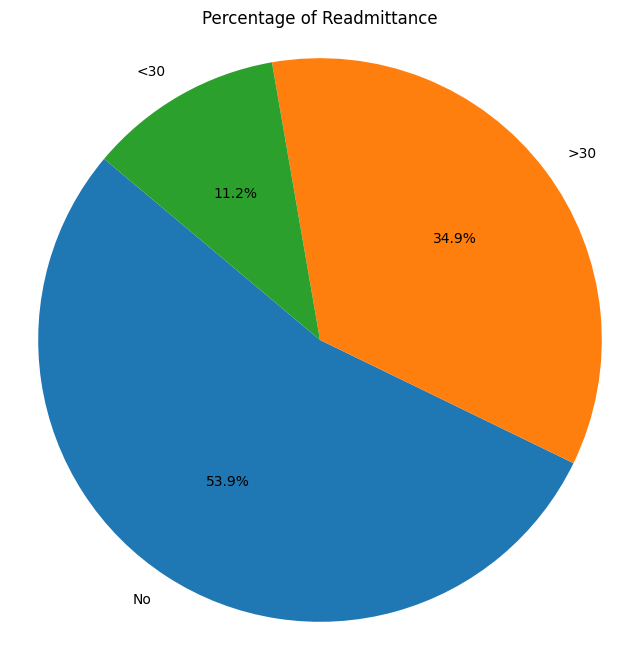

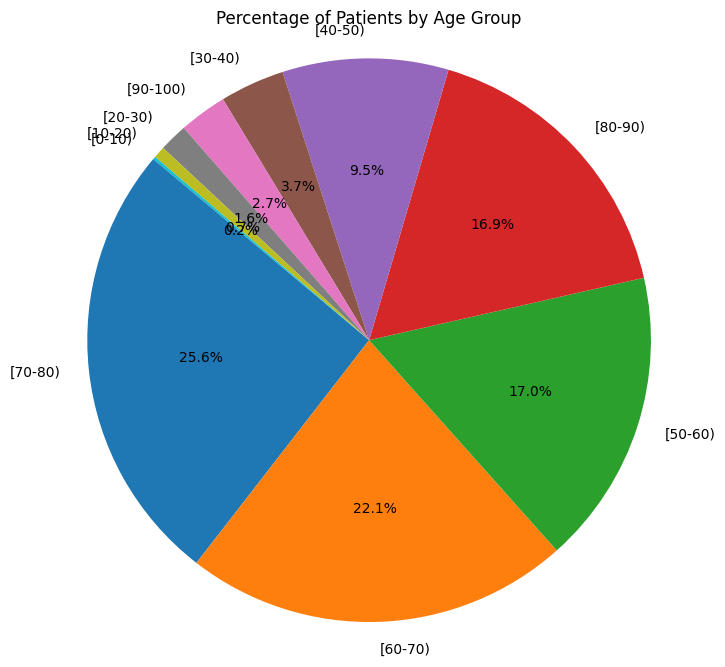

In [44]:

# Pie chart for readmittance percentages
readmit_counts = df['readmitted_mapped'].value_counts()
readmit_labels = readmit_counts.index
readmit_sizes = readmit_counts.values

plt.figure(figsize=(8, 8))
plt.pie(readmit_sizes, labels=readmit_labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Readmittance')
plt.axis('equal')
plt.show()

# Pie chart for age percentages
age_counts = df['age'].value_counts()
age_labels = age_counts.index
age_sizes = age_counts.values

plt.figure(figsize=(8, 8))
plt.pie(age_sizes, labels=age_labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Patients by Age Group')
plt.axis('equal')
plt.show()

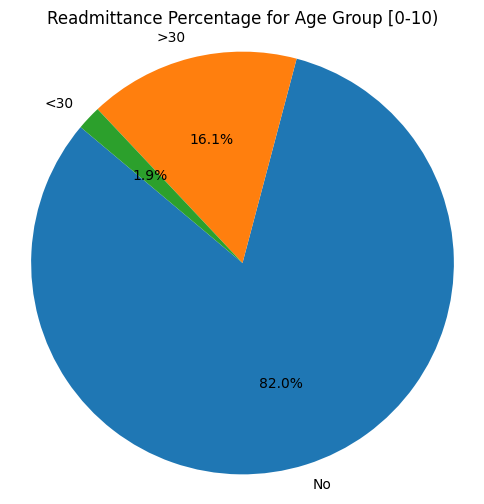

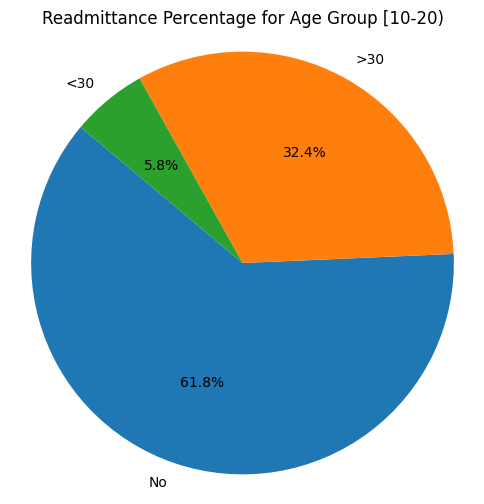

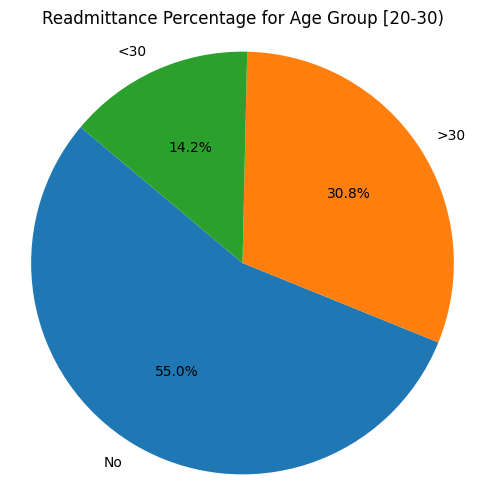

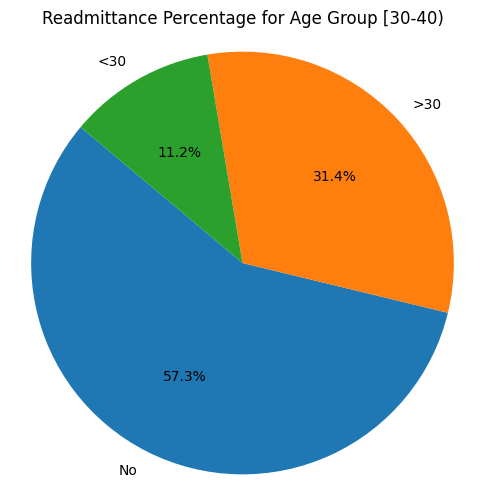

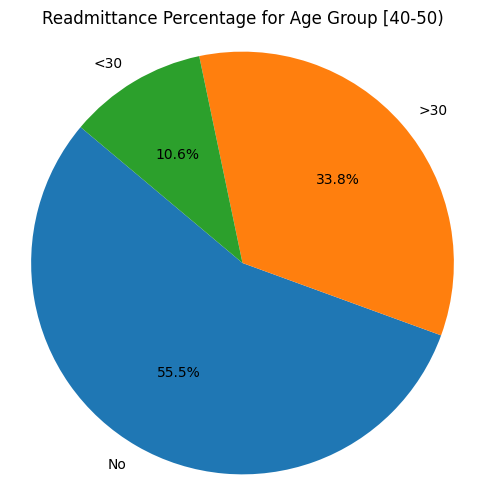

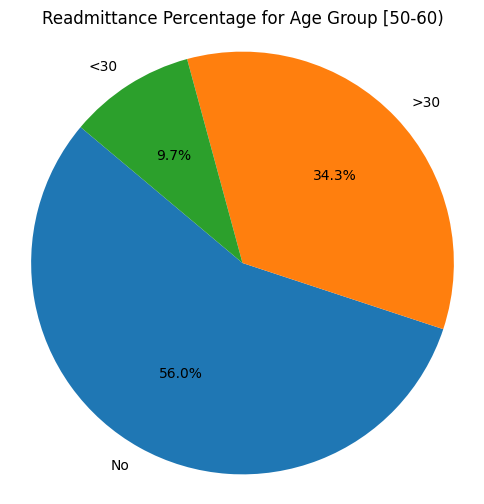

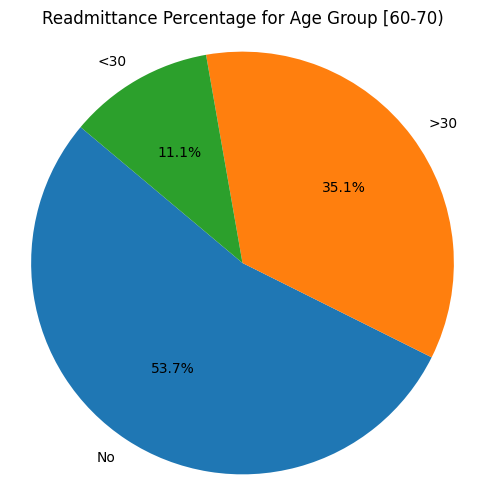

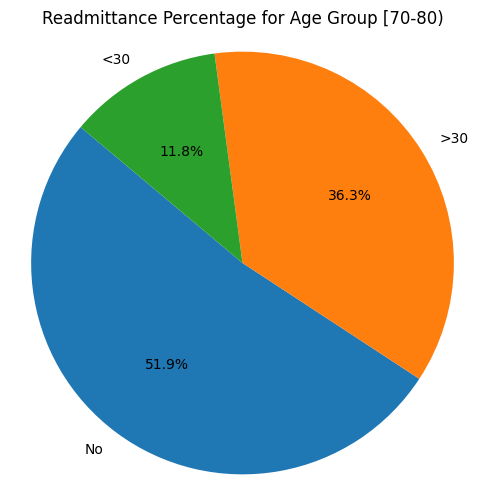

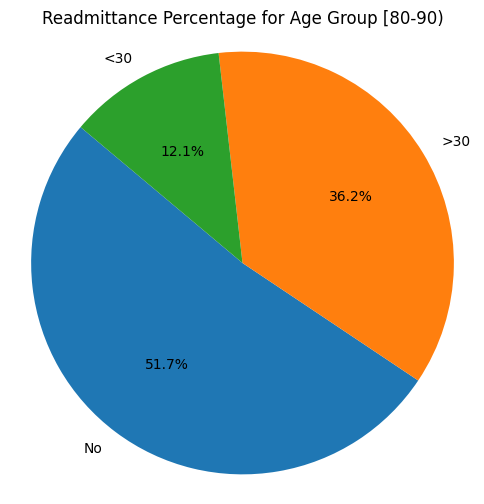

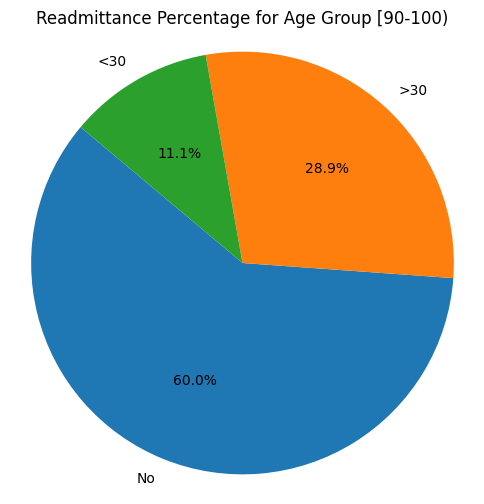

In [45]:
# Pie charts of readmittance percentages within each age group
age_groups = df['age'].unique()

for age_group in age_groups:
    subset = df[df['age'] == age_group]
    readmit_counts = subset['readmitted_mapped'].value_counts()
    readmit_labels = readmit_counts.index
    readmit_sizes = readmit_counts.values

    plt.figure(figsize=(6,6))
    plt.pie(readmit_sizes, labels=readmit_labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Readmittance Percentage for Age Group {age_group}')
    plt.axis('equal')
    plt.show()

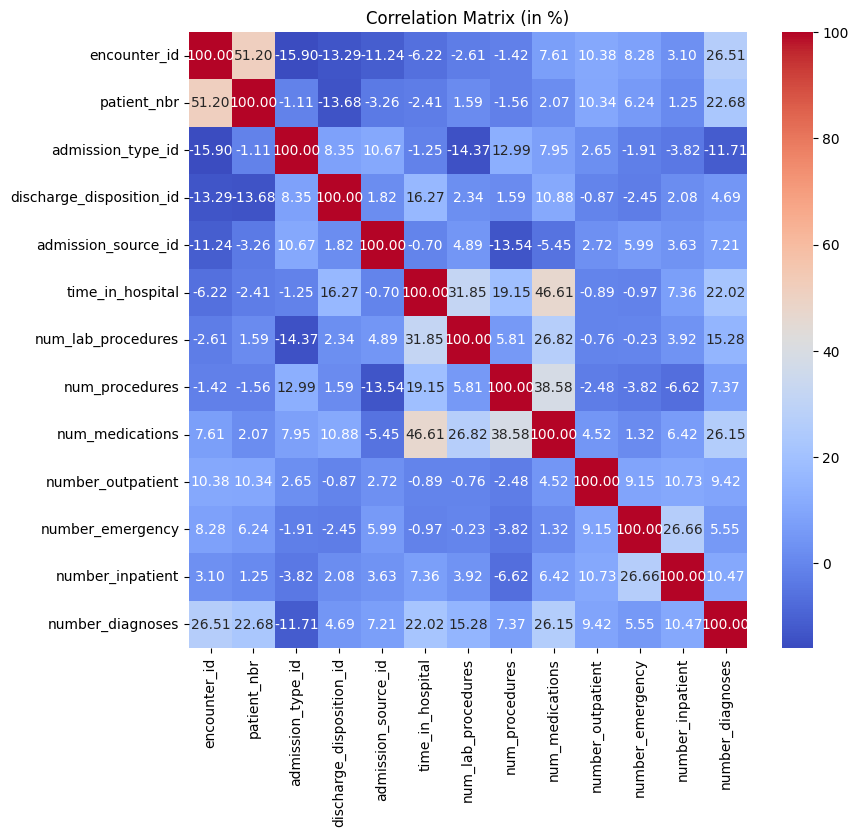

In [36]:

df2 = df.select_dtypes(include=[np.number])
corr = df2.corr()

corr_percent = corr * 100

plt.figure(figsize=(9, 8))  
sns.heatmap(corr_percent, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (in %)')
plt.show()